In [2]:
!pip install natsort

In [3]:
import pandas as pd
import glob
import os


def read_file(path):
    all_files = glob.glob(os.path.join(path , "*.csv"))
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, header=None)
        li.append(df)
    final_df = pd.concat(li, axis=0, ignore_index=True)
    return final_df


In [4]:

import pandas as pd
import glob
import os
from natsort import natsorted


def sort_read_file(path):
    all_files = glob.glob(os.path.join(path , "*.csv"))
    all_files = natsorted(all_files)
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, header=None)
        li.append(df)
    final_df = pd.concat(li, axis=0, ignore_index=True)
    return final_df


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
def plot_box(LSTM_path, GRU_path):
    LSTM_df = sort_read_file(LSTM_path)
    GRU_df = sort_read_file(GRU_path)
    final_df = pd.concat([LSTM_df, GRU_df.iloc[:,-1].to_frame()], axis=1)
    new_final_df = final_df.iloc[:, 1:3]
    new_final_df.columns =  ["LSTM", "GRU"]
    new_final_df["Number of Stages"] = (new_final_df.index // 10) + 1  
    auc_melted = new_final_df.melt(id_vars="Number of Stages",var_name='Model', value_name='AUC')
    figure(figsize=(12,7), dpi=120)
    sns.boxplot(x='Number of Stages', y='AUC', hue ='Model', data=auc_melted,)
    plt.title('AUC Scores Comparison Across Models')
    plt.show()
    
    


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
def plot_box(LSTM_path, GRU_path, LSTM_runtime, GRU_runtime,file_name):
    LSTM_df = sort_read_file(LSTM_path)
    GRU_df = sort_read_file(GRU_path)
    final_df = pd.concat([LSTM_df, GRU_df.iloc[:,-1].to_frame()], axis=1)
    new_final_df = final_df.iloc[:, 1:3]
    new_final_df.columns =  ["LSTM", "GRU"]
    new_final_df["Number of Stages"] = (new_final_df.index // 10) + 1  
    auc_melted = new_final_df.melt(id_vars="Number of Stages",var_name='Model', value_name='AUC')

    LSTM_df = sort_read_file(LSTM_runtime)
    GRU_df = sort_read_file(GRU_runtime)
    final_runtime_df = pd.concat([LSTM_df, GRU_df.iloc[:,-1].to_frame()], axis=1)
    final_runtime_df.columns =  ["LSTM", "GRU"] 
    final_runtime_df["Number of Stages"] = final_runtime_df.index + 1 
    
    #figure(figsize=(12,7), dpi=120)
    fig, ax = plt.subplots(figsize=(12, 7))
    
    sns.boxplot(x='Number of Stages', y='AUC', hue ='Model', data=auc_melted,)

    auc_runtime_melted = final_runtime_df.melt(id_vars="Number of Stages",var_name='Model', value_name='Runtime')
    auc_runtime_melted['Runtime'] = pd.to_timedelta(auc_runtime_melted['Runtime'])


    hue_order = auc_runtime_melted['Model'].unique()
    num_models = len(hue_order)


    positions = []
    for i, stage in enumerate(sorted(auc_runtime_melted['Number of Stages'].unique())):
        for j, model in enumerate(hue_order):
            # Calculate box position
            if model == "GRU":
                Runtime_color = "orange"
            else:
                Runtime_color = "blue"
            xpos = i - 0.4 + j * (0.8 / num_models) + (0.8 / num_models) / 2
            ypos = ax.get_ylim()[0] + 0.005  # slightly below the y-axis
    
            # Get runtime
            rt = auc_runtime_melted[(auc_runtime_melted["Number of Stages"] == stage) & (auc_runtime_melted["Model"] == model)]["Runtime"].values
            rt = pd.to_timedelta(rt)
            #rt = str(rt).split()[-1]
        #rt = "10"
            if rt is not None:
                ax.text(xpos,ypos, f'{str(rt).split()[2][0:5]}', ha='center', va='bottom', fontsize=8, color=Runtime_color)
                            
    #figure(figsize=(12,7), dpi=120)
    #sns.boxplot(x='Number of Stages', y='AUC', hue ='Model', data=auc_melted,)
    plt.title('AUC Scores Comparison Across Models')
    plt.show
    plt.savefig(file_name)
    
    


In [5]:
LSTM_df = sort_read_file(r'SMD_result/Batch_50_layer_1_AUC/LSTM')
GRU_df = sort_read_file(r'SMD_result/Batch_50_layer_1_AUC/GRU')
final_df = pd.concat([LSTM_df, GRU_df.iloc[:,-1].to_frame()], axis=1)
new_final_df = final_df.iloc[:, 1:3]
new_final_df.columns =  ["LSTM", "GRU"]
new_final_df["Number of Stages"] = (new_final_df.index // 10) + 1  
auc_melted = new_final_df.melt(id_vars="Number of Stages",var_name='Model', value_name='AUC')

In [6]:
auc_melted

,Number of Stages,Model,AUC
0,1,LSTM,0.867260
1,1,LSTM,0.863151
2,1,LSTM,0.630614
3,1,LSTM,0.871676
4,1,LSTM,0.875338
...,...,...,...
195,10,GRU,0.631016
196,10,GRU,0.630150
197,10,GRU,0.631977
198,10,GRU,0.630795


In [7]:
LSTM_1_path = r'SMD_result/Batch_50_layer_1_AUC/LSTM' # use your path
GRU_1_path = r'SMD_result/Batch_50_layer_1_AUC/GRU'
LSTM_1_Runtime = r'SMD_result/Batch_50_layer_1_Runtime/LSTM'
GRU_1_Runtime = r'SMD_result/Batch_50_layer_1_Runtime/GRU'

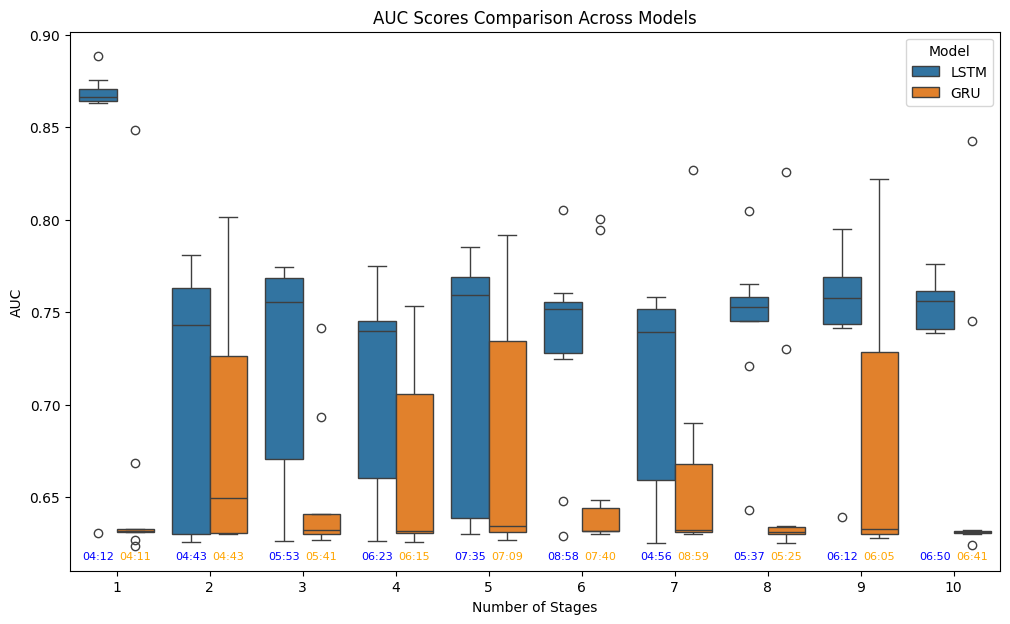

In [8]:
plot_box(LSTM_1_path, GRU_1_path, LSTM_1_Runtime, GRU_1_Runtime, "SMD_1.png")

In [205]:
LSTM_2_path = r'SMD_result/Batch_50_layer_2_AUC/LSTM' # use your path
GRU_2_path = r'SMD_result/Batch_50_layer_2_AUC/GRU'
LSTM_2_Runtime = r'SMD_result/Batch_50_layer_2_Runtime/LSTM'
GRU_2_Runtime = r'SMD_result/Batch_50_layer_2_Runtime/GRU'

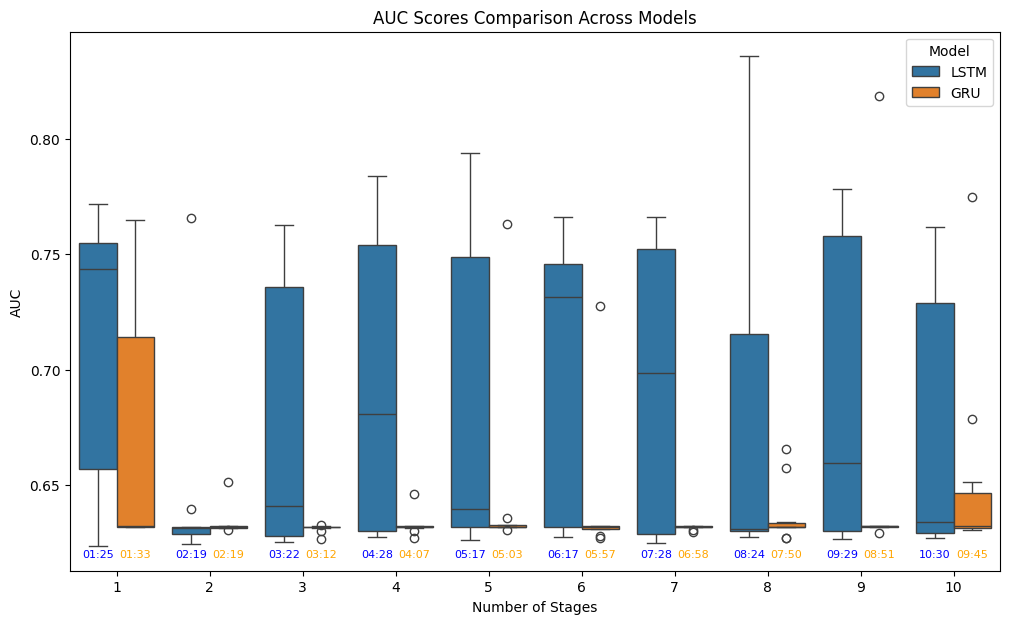

In [225]:
plot_box(LSTM_2_path, GRU_2_path, LSTM_2_Runtime, GRU_2_Runtime,"SMD_2.png")

In [16]:
LSTM_3_path = r'SMD_result/Batch_50_layer_3_AUC/LSTM' # use your path
GRU_3_path = r'SMD_result/Batch_50_layer_3_AUC/GRU'
LSTM_3_Runtime = r'SMD_result/Batch_50_layer_3_Runtime/LSTM'
GRU_3_Runtime = r'SMD_result/Batch_50_layer_3_Runtime/GRU'

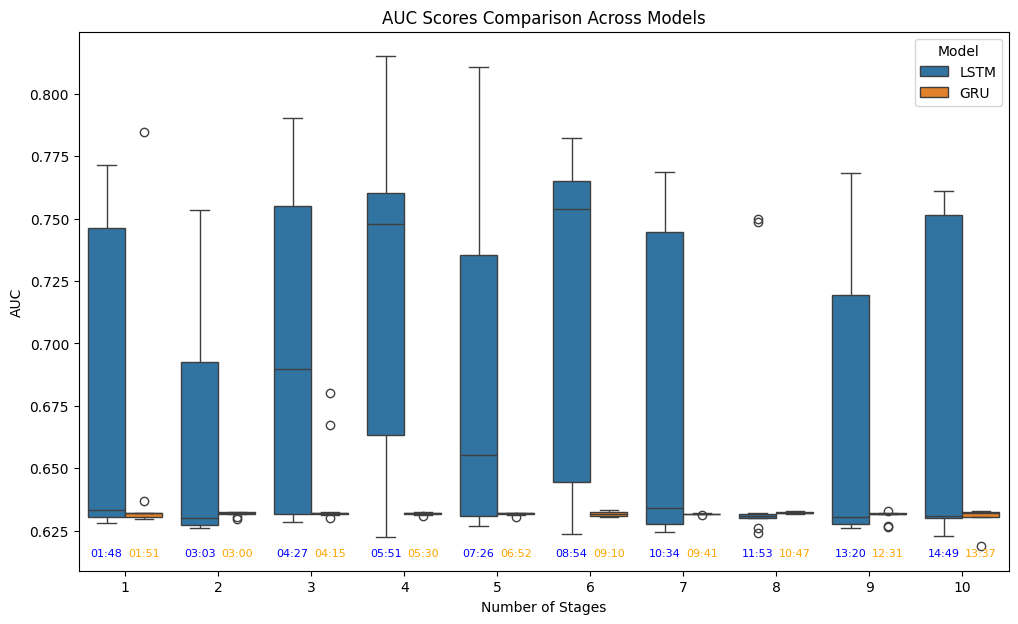

In [17]:
plot_box(LSTM_3_path, GRU_3_path, LSTM_3_Runtime, GRU_3_Runtime,"SMD_3.png")

In [15]:
EDG_LSTM_path = r'EDG_result/ECG_5/LSTM/Result' # use your path
EDG_GRU_path = r'EDG_result/ECG_5/GRU/Result'
EDG_LSTM_Runtime = r'EDG_result/ECG_5/LSTM/Runtime'
EDG_GRU_Runtime = r'EDG_result/ECG_5/GRU/Runtime'

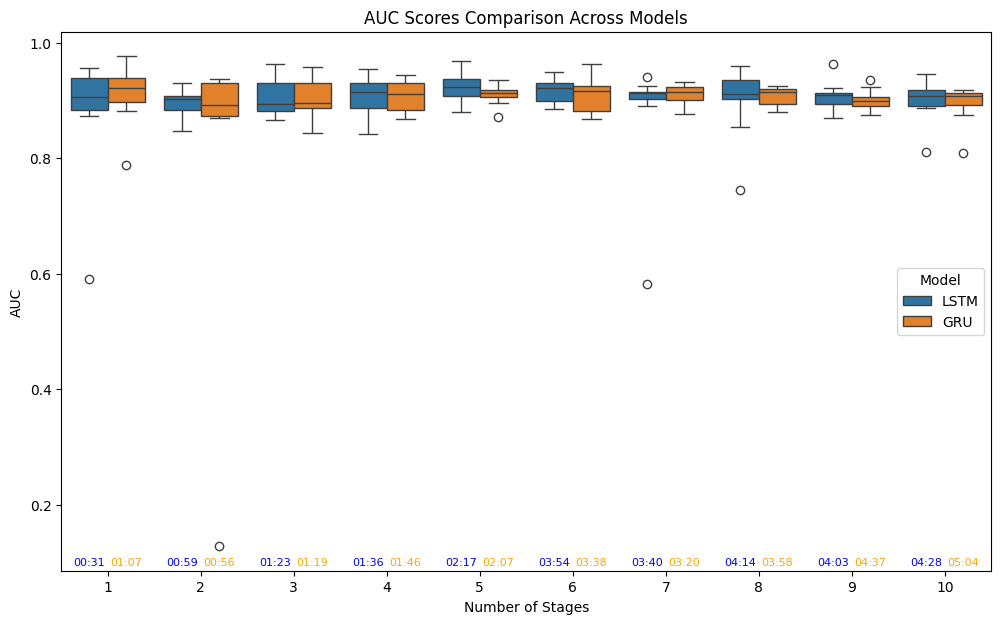

In [22]:
plot_box(EDG_LSTM_path, EDG_GRU_path, EDG_LSTM_Runtime, EDG_GRU_Runtime, "EDG_5.png")

In [15]:
final_result =df.drop(df.index[:5])

NameError: name 'df' is not defined

In [17]:
final_result


,0,1
5,0,0.629193
6,1,0.625906
7,2,0.626770
8,3,0.627130
9,4,0.631756
10,5,0.753537
11,6,0.631276
12,7,0.748438
13,8,0.712883
14,9,0.627927


In [21]:
final_result.to_csv("your_file_cleaned.csv",index = False, header = False)

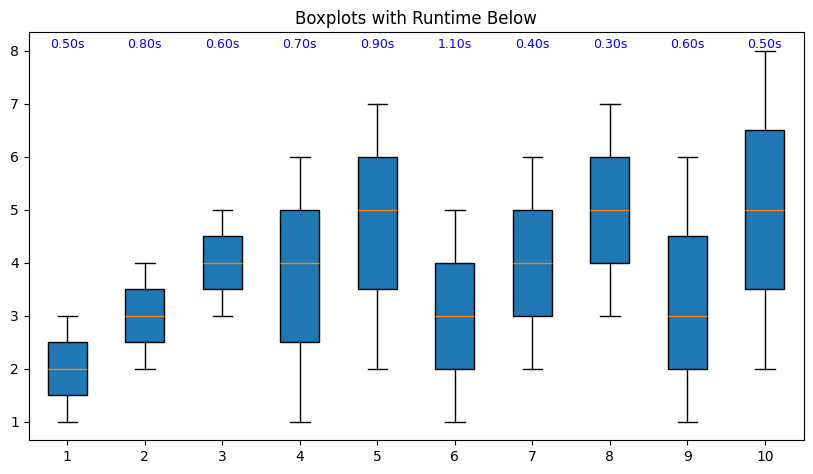

In [65]:
import matplotlib.pyplot as plt

# Example data
data = [ [1,2,3], [2,3,4], [3,4,5], [1,4,6], [2,5,7],
         [1,3,5], [2,4,6], [3,5,7], [1,3,6], [2,5,8] ]
runtimes = [0.5, 0.8, 0.6, 0.7, 0.9, 1.1, 0.4, 0.3, 0.6, 0.5]  # one for each box

fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(data, patch_artist=True)

# Set x-ticks and labels
#ax.set_xticks(range(1, len(data)+1))
#ax.set_xticklabels([f'Model {i+1}' for i in range(len(data))])

# Add runtime below each boxplot
for i, rt in enumerate(runtimes):
    ax.text(i+1, ax.get_ylim()[1] - 0.1, f'{rt:.2f}s',
            ha='center', va='top', fontsize=9, color='blue')

# Add some spacing below
plt.subplots_adjust(bottom=0.2)
ax.set_title("Boxplots with Runtime Below")
plt.show()

NameError: name 'h' is not defined

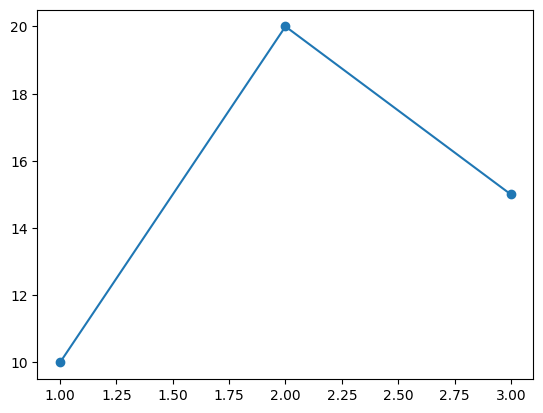

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Example time data (as strings)
times = ["4:12:58", "5:30:15", "6:45:20"]

# Convert to pandas Timedelta
timedeltas = pd.to_timedelta(times)

# Plot some dummy data
x = [1, 2, 3]
y = [10, 20, 15]

plt.plot(x, y, 'o-')

for xi, yi, t in zip(x, y, timedeltas):
    plt.text(xi, yi, f"t: {int(h)}h {int(m)}m {int(s)}", 
             ha='center', va='bottom', fontsize=9, color='blue')

plt.title("Time annotation with types")
plt.show()



In [94]:
timedeltas

TimedeltaIndex(['0 days 04:12:58', '0 days 05:30:15', '0 days 06:45:20'], dtype='timedelta64[ns]', freq=None)

In [95]:
seconds = timedeltas.total_seconds()

In [96]:
seconds

Index([15178.0, 19815.0, 24320.0], dtype='float64')